<a href="https://colab.research.google.com/github/hsw1805/ML-DL/blob/main/02_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#도미 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
#도미 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [4]:
#빙어 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
#빙어 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

##그래프 그려보기

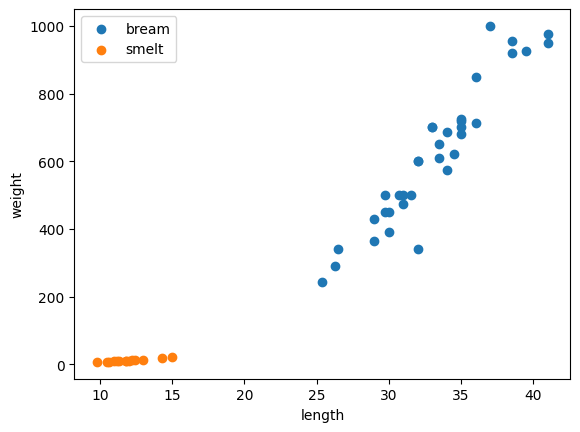

In [5]:
import matplotlib.pyplot as plt

# 데이터 설정
plt.scatter(bream_length, bream_weight, label="bream")
plt.scatter(smelt_length, smelt_weight, label="smelt")

# 축 레이블 설정
plt.xlabel('length')
plt.ylabel('weight')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()


###학습 데이터 셋 만들기

In [6]:
fish_length = smelt_length+bream_length
fish_weight = smelt_weight+bream_weight
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target=[1]*35 + [0]*14


###KNN 학습

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(fish_data,fish_target)
knn.score(fish_data,fish_target)

0.9183673469387755

In [8]:
knn.score(fish_data,fish_target)

0.9183673469387755

In [9]:
knn.predict([[30,600]])

array([1])

In [10]:
knn._y==fish_target

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

###KNN단점
데이터의 크기가 크면 사용하기 힘듦
또한 직선거리 계산하는 데에 많은 메모리가 필요하고 많은 시간 소요

###퀴즈 4
KNN의 n_neighbors을 5~49까지 바꿔서 점수가 1.0아래로 내려가는 이웃의 개수 찾기

In [11]:
for i in range(5,50):
  knn.n_neighbors=i
  score = knn.score(fish_data, fish_target)
  if score < 1:
    print(i, score)


5 0.9183673469387755
6 0.9183673469387755
7 0.9387755102040817
8 0.9387755102040817
9 0.9387755102040817
10 0.9387755102040817
11 0.9387755102040817
12 0.9183673469387755
13 0.9387755102040817
14 0.9387755102040817
15 0.9387755102040817
16 0.9387755102040817
17 0.9183673469387755
18 0.9183673469387755
19 0.9183673469387755
20 0.9183673469387755
21 0.8571428571428571
22 0.9183673469387755
23 0.8979591836734694
24 0.9183673469387755
25 0.9183673469387755
26 0.9183673469387755
27 0.8775510204081632
28 0.8979591836734694
29 0.7142857142857143
30 0.7142857142857143
31 0.7142857142857143
32 0.7142857142857143
33 0.7142857142857143
34 0.7142857142857143
35 0.7142857142857143
36 0.7142857142857143
37 0.7142857142857143
38 0.7142857142857143
39 0.7142857142857143
40 0.7142857142857143
41 0.7142857142857143
42 0.7142857142857143
43 0.7142857142857143
44 0.7142857142857143
45 0.7142857142857143
46 0.7142857142857143
47 0.7142857142857143
48 0.7142857142857143
49 0.7142857142857143


##testset / trainset 구분

위의 코드는 overfitting의 위험이 있다
정답지를 알고 있는 상태에서 정답을 학습하고 정답으로 score을 내기
때문에 score함수의 성능평가는 의미가 없으므로 기본 dataset에서 trainset과 testset구분 한다.

In [12]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [13]:
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

###testset과 trainset 생성 시 주의점
기본 데이터 set에서 trainset과 testset을 빼내려고 할 때 특정 결과값이 비율보다 많거나 적게 들어가면 안 됨
(샘플링 편향이 일어나면 안 됨!)

그래서 보통 랜덤해서 뽑음 (numpy 의 random함수)

In [14]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [22]:
#random.seed를 사용하여 같은 seed값을 쓰면 random값은 동일함
#동일한 결과를 뽑을 때 유용
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [28]:
#train set 35개 랜덤해서 뽑은 거
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

#test set 나머지에서 뽑기
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]


array([[  32. ,  340. ],
       [  12.4,   13.4],
       [  14.3,   19.7],
       [  12.2,   12.2],
       [  33. ,  700. ],
       [  36. ,  714. ],
       [  35. ,  720. ],
       [  35. ,  725. ],
       [  38.5,  955. ],
       [  33.5,  650. ],
       [  31.5,  500. ],
       [  29. ,  430. ],
       [  41. ,  950. ],
       [  30. ,  450. ],
       [  29. ,  363. ],
       [  29.7,  500. ],
       [  11.3,    8.7],
       [  11.8,   10. ],
       [  13. ,   12.2],
       [  32. ,  600. ],
       [  30.7,  500. ],
       [  33. ,  700. ],
       [  35. ,  700. ],
       [  41. ,  975. ],
       [  38.5,  920. ],
       [  25.4,  242. ],
       [  12. ,    9.8],
       [  39.5,  925. ],
       [  29.7,  450. ],
       [  37. , 1000. ],
       [  31. ,  500. ],
       [  10.5,    7.5],
       [  26.3,  290. ],
       [  34. ,  685. ],
       [  26.5,  340. ]])

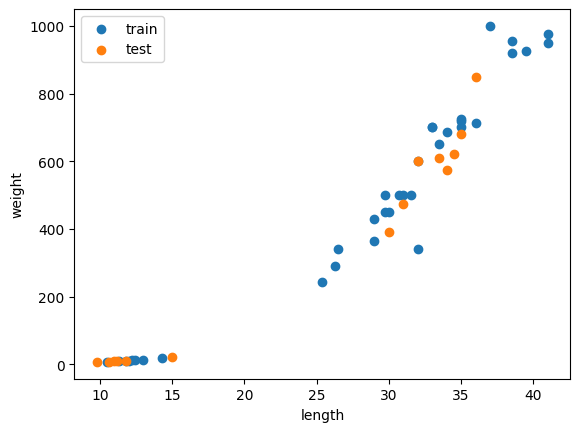

In [30]:
#잘 뽑혔나 확인
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1],label="train")
plt.scatter(test_input[:,0], test_input[:,1], label = "test")
plt.xlabel("length")
plt.ylabel("weight")
plt.legend()
plt.show()

###랜덤해서 뽑은 데이터로 학습하기

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_input, train_target)
knn.predict(test_input)
knn.score(test_input, test_target)

1.0